# Task 4
### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.



### 1. Setup and Data Loading

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
# Make sure 'twitter_training.csv' is uploaded to your Google Colab environment
try:
    df = pd.read_csv('/content/drive/MyDrive/Prodigy internship /twitter_training.csv', header=None, names=['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content'])
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: '/content/drive/MyDrive/Prodigy internship /twitter_training.csv' not found. Please upload the file to your Colab environment.")
    exit()

# Display the first few rows and basic info
print("\nDataset Head:")
print(df.head())
print("\nDataset Info:")
df.info()
print("\nSentiment Distribution (Raw):")
print(df['Sentiment'].value_counts())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset loaded successfully.

Dataset Head:
   Tweet ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24004 entries, 0 to 24003
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       24004 non-null  int64 
 1   Entity         24004 non-null  object
 2   Sentiment      24004 non-null  object
 3   Tweet Content  23784 non-null  object
dtypes: int64(1)

### **2. Data Cleaning and Preprocessing**

Social media data is often noisy. We need to clean the text before sentiment analysis.

In [5]:
# Drop rows with missing tweet content
df.dropna(subset=['Tweet Content'], inplace=True)

# Convert 'Tweet Content' to string type to handle potential non-string entries
df['Tweet Content'] = df['Tweet Content'].astype(str)

# Function to clean text
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    text = re.sub(r'@\w+|#\w+', '', text) # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    return text

df['Cleaned Tweet Content'] = df['Tweet Content'].apply(clean_text)

print("\nCleaned Data Head:")
print(df[['Tweet Content', 'Cleaned Tweet Content', 'Sentiment']].head())



Cleaned Data Head:
                                       Tweet Content  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                               Cleaned Tweet Content Sentiment  
0  im getting on borderlands and i will murder yo...  Positive  
1  i am coming to the borders and i will kill you...  Positive  
2  im getting on borderlands and i will kill you all  Positive  
3  im coming on borderlands and i will murder you...  Positive  
4  im getting on borderlands and i will murder yo...  Positive  


### **3. Sentiment Analysis (Using TextBlob)**

We'll use TextBlob for sentiment analysis. TextBlob provides a polarity score (ranging from -1 to 1, where -1 is negative, 0 is neutral, and 1 is positive) and a subjectivity score (ranging from 0 to 1, where 0 is objective and 1 is subjective).

For this dataset, we already have a Sentiment column. We'll use TextBlob to verify or compare with the given sentiment, and also to get a numerical polarity score for more granular analysis.

In [6]:
# Function to get sentiment polarity using TextBlob
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['TextBlob Polarity'] = df['Cleaned Tweet Content'].apply(get_textblob_sentiment)

# Map TextBlob polarity to categorical sentiment for comparison
def map_polarity_to_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['TextBlob Sentiment'] = df['TextBlob Polarity'].apply(map_polarity_to_sentiment)

print("\nData with TextBlob Sentiment:")
print(df[['Sentiment', 'TextBlob Polarity', 'TextBlob Sentiment']].head())



Data with TextBlob Sentiment:
  Sentiment  TextBlob Polarity TextBlob Sentiment
0  Positive                0.0            Neutral
1  Positive                0.0            Neutral
2  Positive                0.0            Neutral
3  Positive                0.0            Neutral
4  Positive                0.0            Neutral


### Overall Sentiment Distribution
Visualize the distribution of the provided sentiment labels and the TextBlob-derived sentiment.

/tmp/ipython-input-7-3829515449.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TextBlob Sentiment', palette='magma', order=df['TextBlob Sentiment'].value_counts().index)


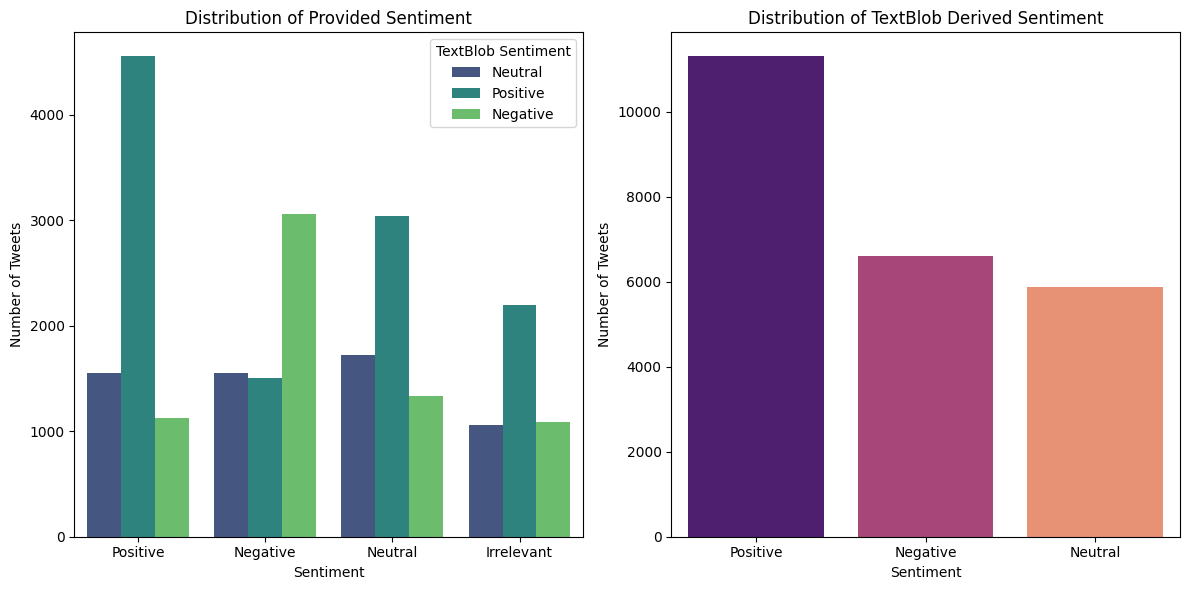

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Sentiment', hue='TextBlob Sentiment', palette='viridis', order=df['Sentiment'].value_counts().index)
plt.title('Distribution of Provided Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='TextBlob Sentiment', palette='magma', order=df['TextBlob Sentiment'].value_counts().index)
plt.title('Distribution of TextBlob Derived Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

plt.tight_layout()
plt.show()


### **Sentiment Distribution by Entity/Brand**
The dataset has an 'Entity' column, which can represent brands or topics. Let's see how sentiment varies across these entities

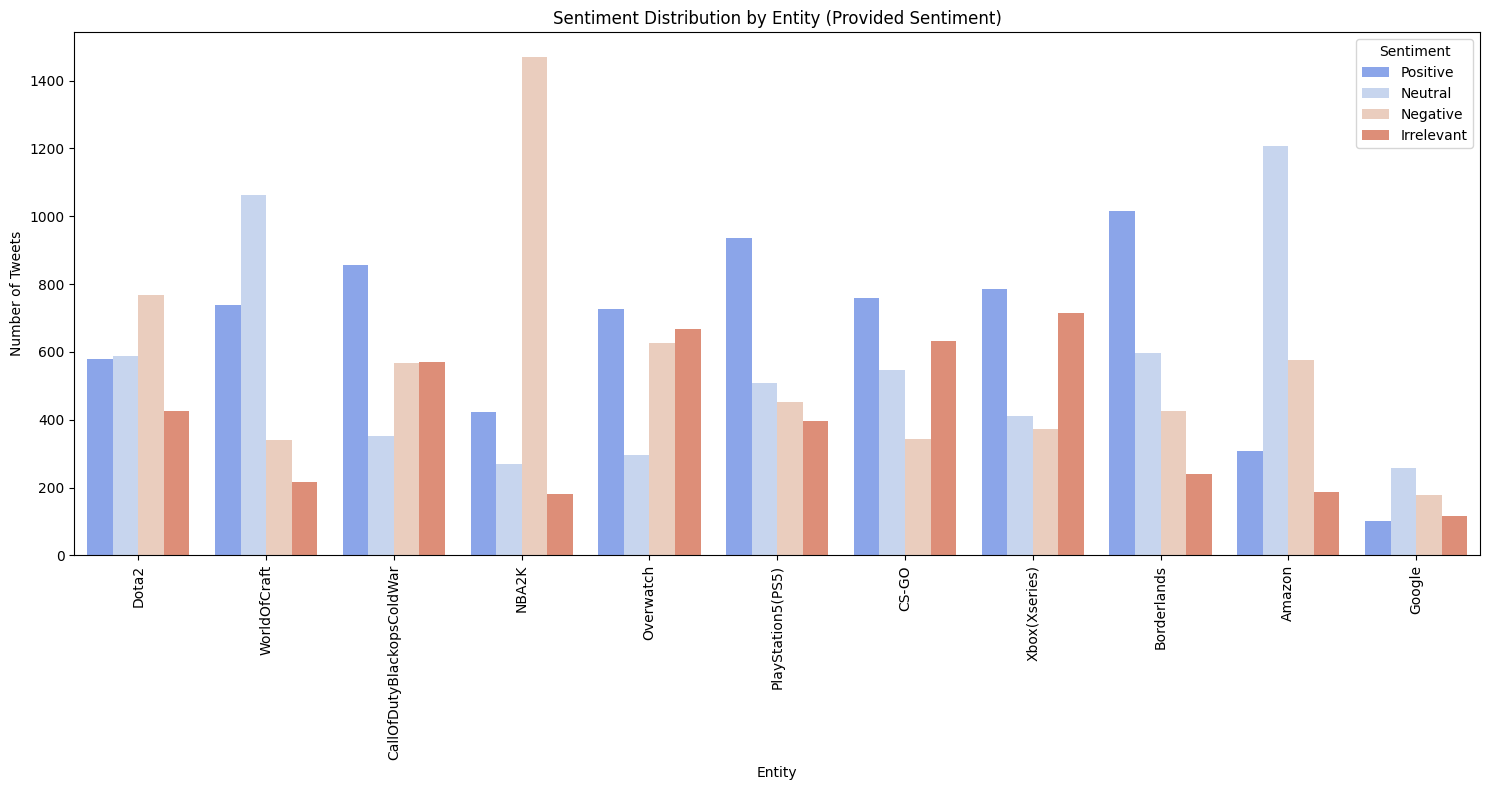

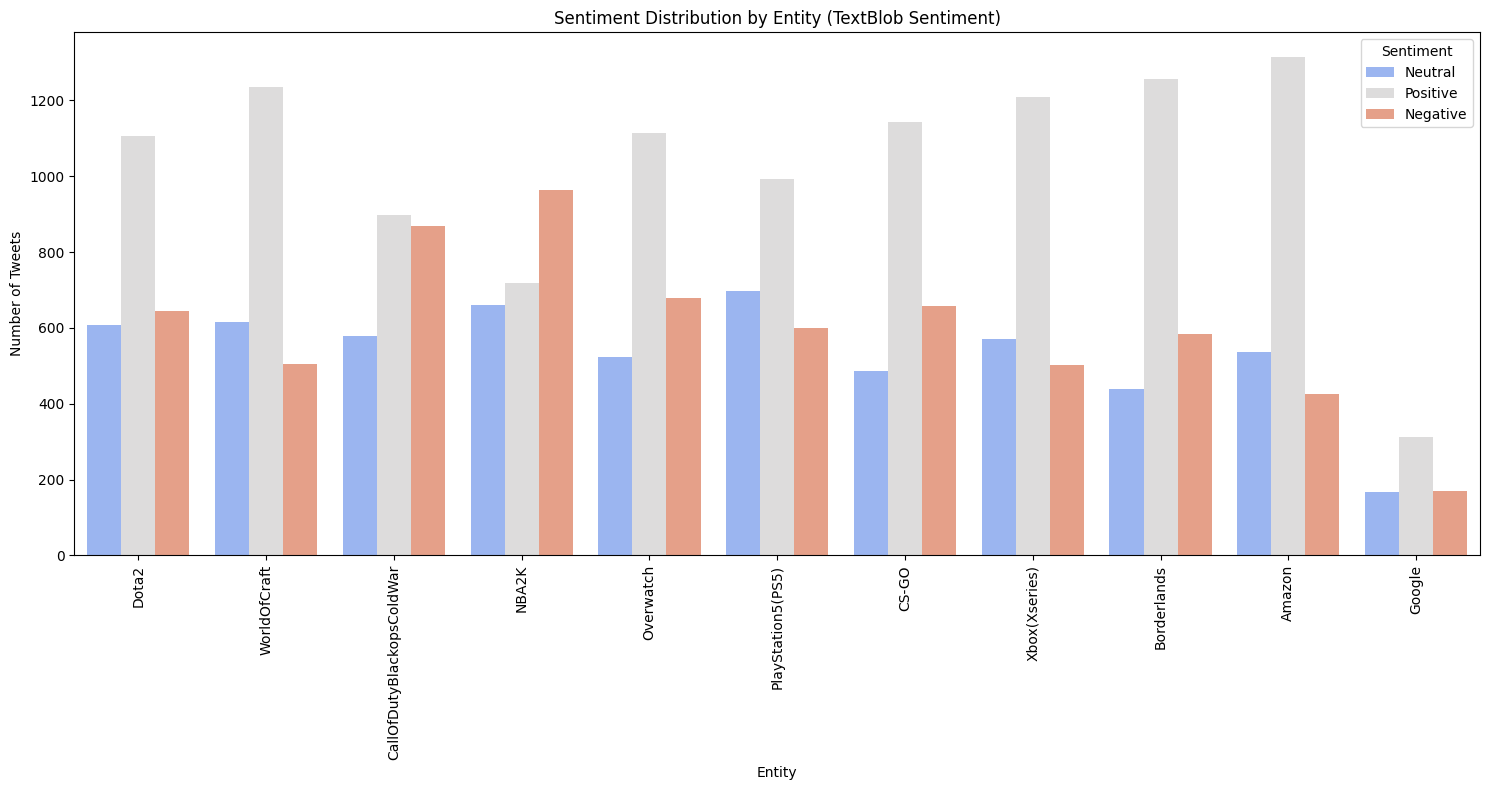

In [8]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Entity', hue='Sentiment', palette='coolwarm', order=df['Entity'].value_counts().index)
plt.title('Sentiment Distribution by Entity (Provided Sentiment)')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='Entity', hue='TextBlob Sentiment', palette='coolwarm', order=df['Entity'].value_counts().index)
plt.title('Sentiment Distribution by Entity (TextBlob Sentiment)')
plt.xlabel('Entity')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


### **Average Polarity by Entity**
the average TextBlob polarity for each entity.

/tmp/ipython-input-9-2071434497.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_polarity_by_entity.values, y=avg_polarity_by_entity.index, palette='RdBu')


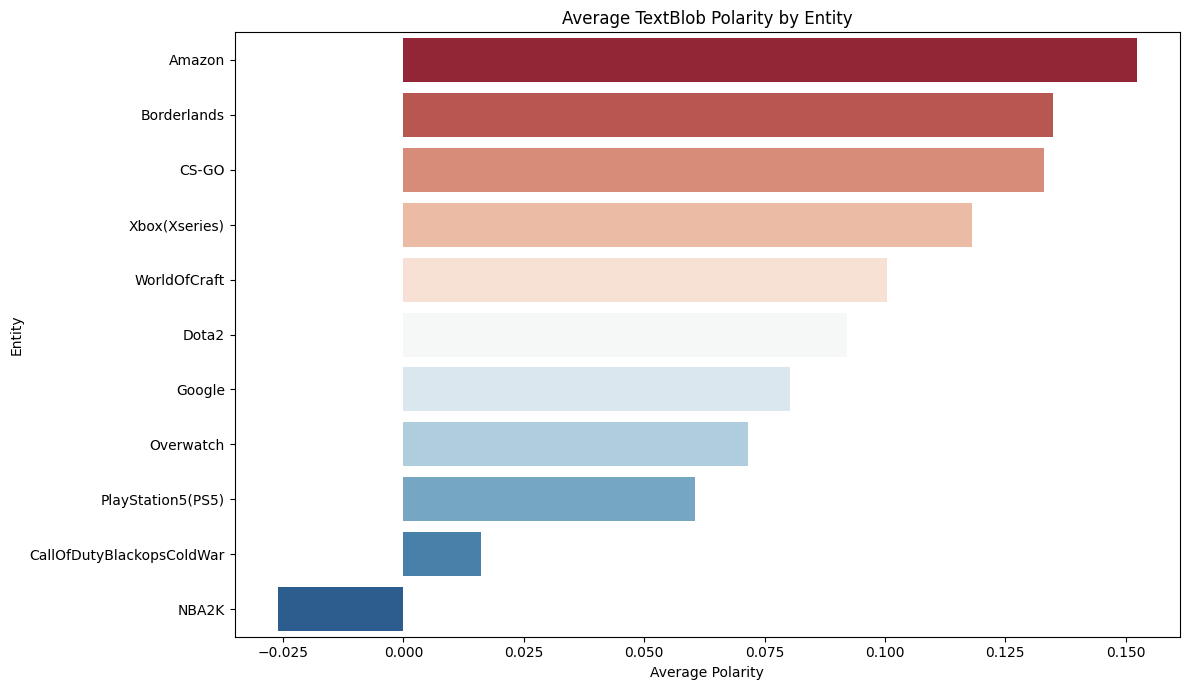

In [9]:
avg_polarity_by_entity = df.groupby('Entity')['TextBlob Polarity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_polarity_by_entity.values, y=avg_polarity_by_entity.index, palette='RdBu')
plt.title('Average TextBlob Polarity by Entity')
plt.xlabel('Average Polarity')
plt.ylabel('Entity')
plt.tight_layout()
plt.show()


### **Word Clouds for Each Sentiment**
Word clouds can visually represent the most frequent words associated with each sentiment.

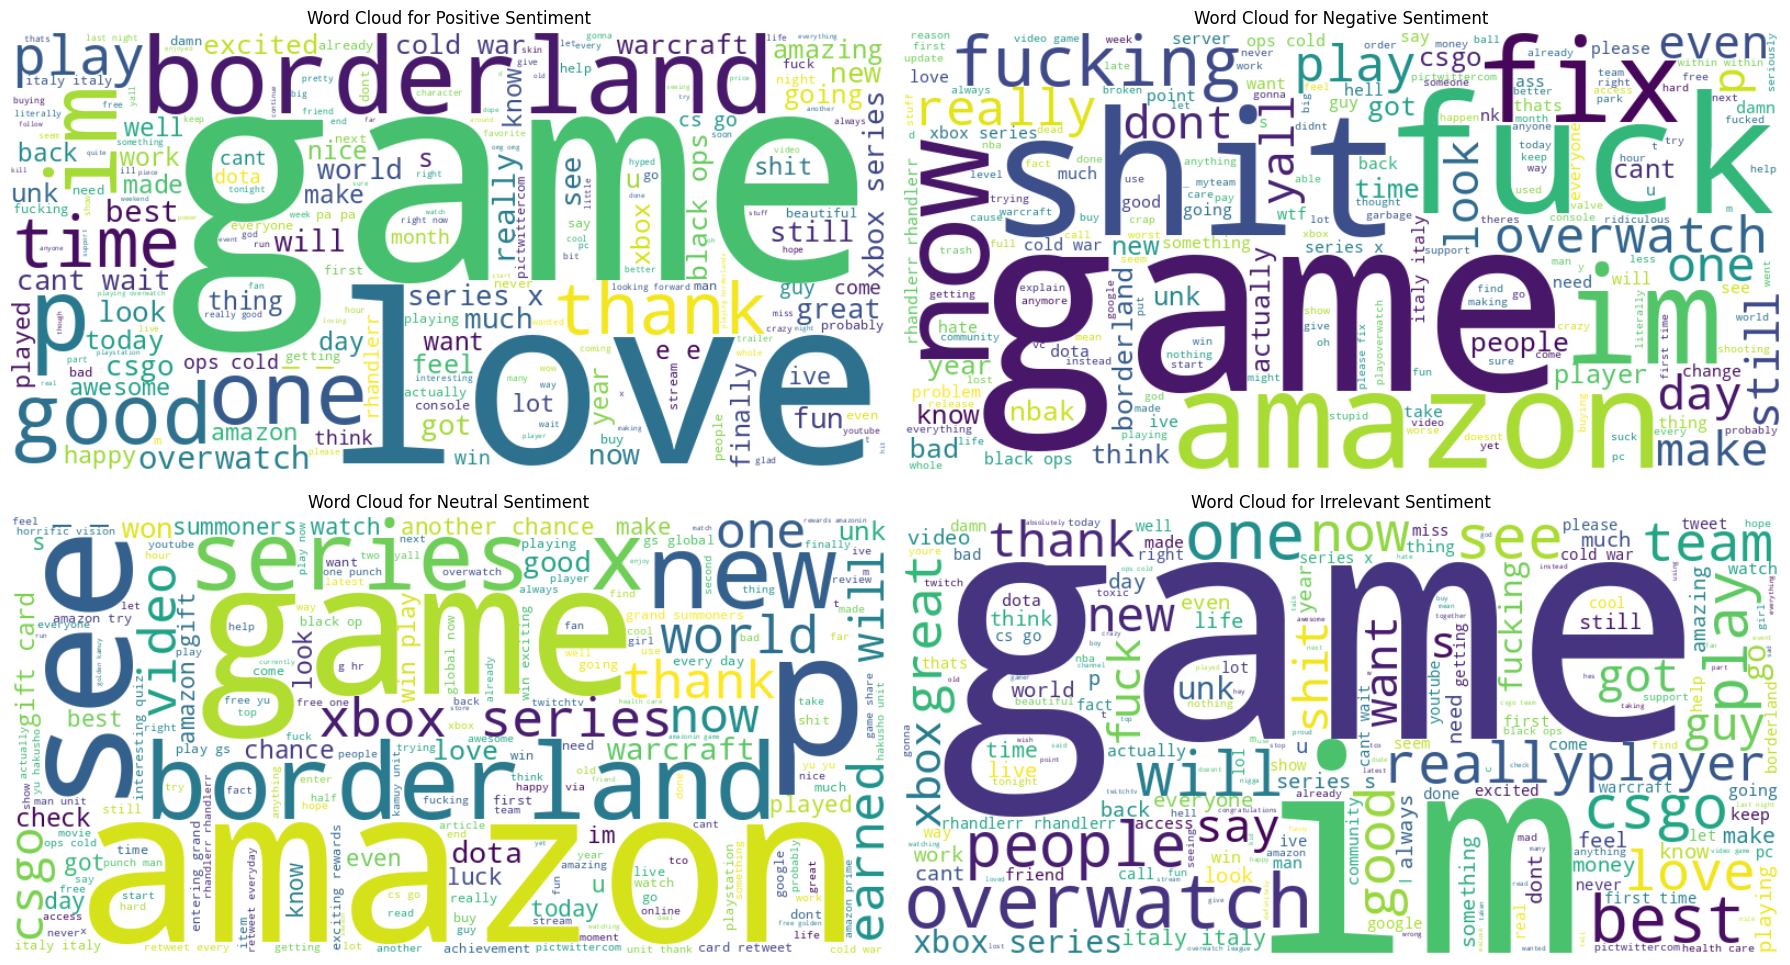

In [11]:
from wordcloud import WordCloud

# Combine text for each sentiment
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Cleaned Tweet Content'])
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Cleaned Tweet Content'])
neutral_text = " ".join(df[df['Sentiment'] == 'Neutral']['Cleaned Tweet Content'])
irrelevant_text = " ".join(df[df['Sentiment'] == 'Irrelevant']['Cleaned Tweet Content'])

# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)
wordcloud_irrelevant = WordCloud(width=800, height=400, background_color='white').generate(irrelevant_text)

plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(wordcloud_irrelevant, interpolation='bilinear')
plt.title('Word Cloud for Irrelevant Sentiment')
plt.axis('off')

plt.tight_layout()
plt.show()


### **Top N-grams for Each Sentiment**
N-grams (sequences of N words) can reveal common phrases.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Top 10 Positive Bigrams: [(('cant', 'wait'), 241), (('series', 'x'), 233), (('xbox', 'series'), 213), (('black', 'ops'), 182), (('cold', 'war'), 178), (('gon', 'na'), 143), (('e', 'e'), 138), (('world', 'warcraft'), 121), (('ops', 'cold'), 115), (('cs', 'go'), 112)]
Top 10 Negative Bigrams: [(('black', 'ops'), 134), (('cold', 'war'), 126), (('ops', 'cold'), 111), (('series', 'x'), 108), (('italy', 'italy'), 98), (('xbox', 'series'), 86), (('rhandlerr', 'rhandlerr'), 82), (('gon', 'na'), 73), (('nba', 'k'), 61), (('looks', 'like'), 49)]
Top 10 Neutral Bigrams: [(('xbox', 'series'), 259), (('series', 'x'), 245), (('chance', 'win'), 217), (('world', 'warcraft'), 167), (('gift', 'card'), 137), (('another', 'chance'), 136), (('amazon', 'gift'), 134), (('win', 'play'), 133), (('summoners', 'watch'), 130), (('watch', 'video'), 127)]
Top 10 Irrelevant Bigrams: [(('xbox', 'series'), 101), (('italy', 'italy'), 98), (('world', 'warcraft'), 63), (('gon', 'na'), 61), (('access', 'health'), 54), ((

/tmp/ipython-input-12-1110283223.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='Blues_d')


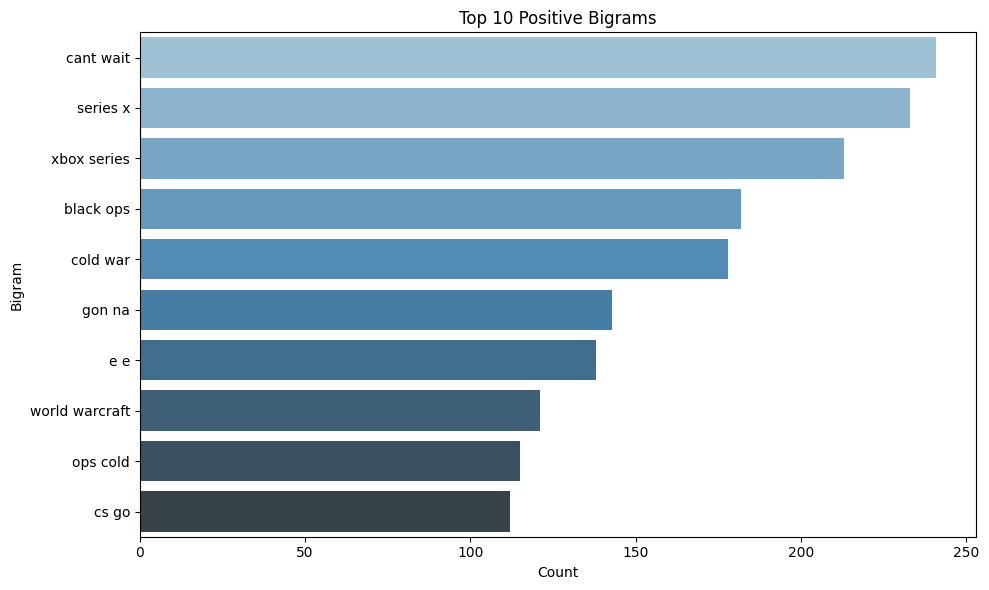

/tmp/ipython-input-12-1110283223.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='Blues_d')


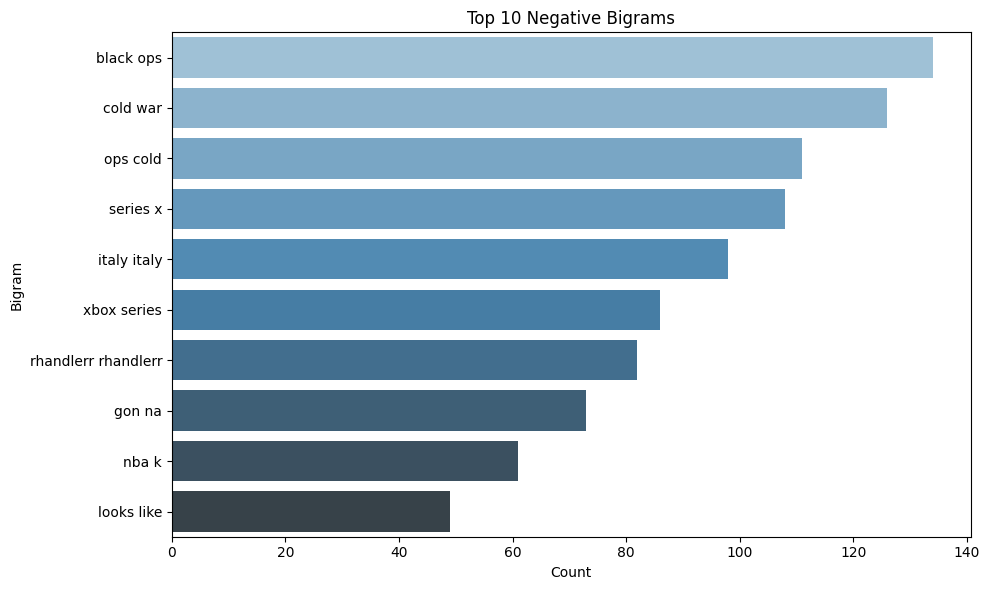

/tmp/ipython-input-12-1110283223.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='Blues_d')


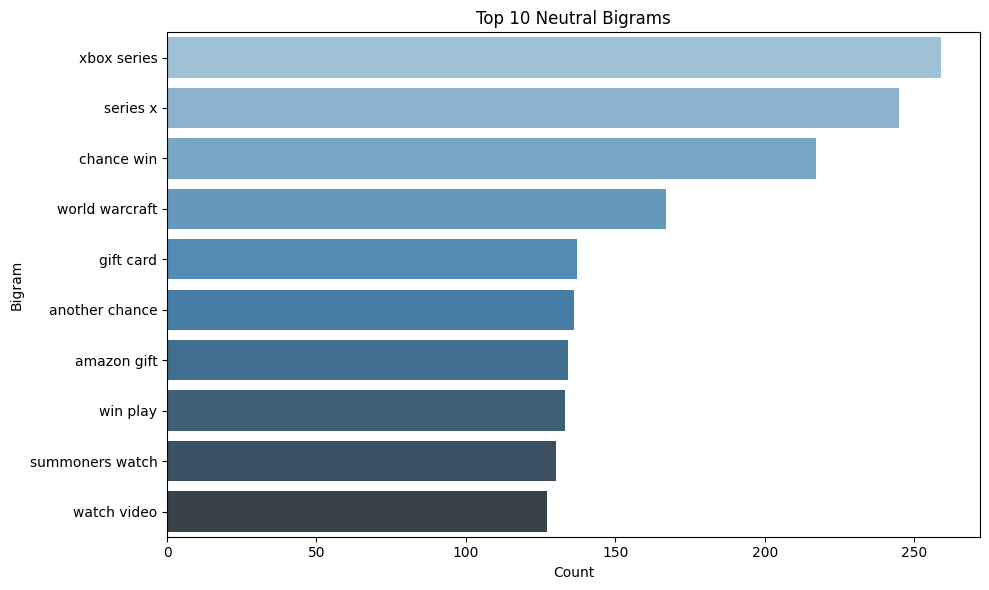

/tmp/ipython-input-12-1110283223.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=words, palette='Blues_d')


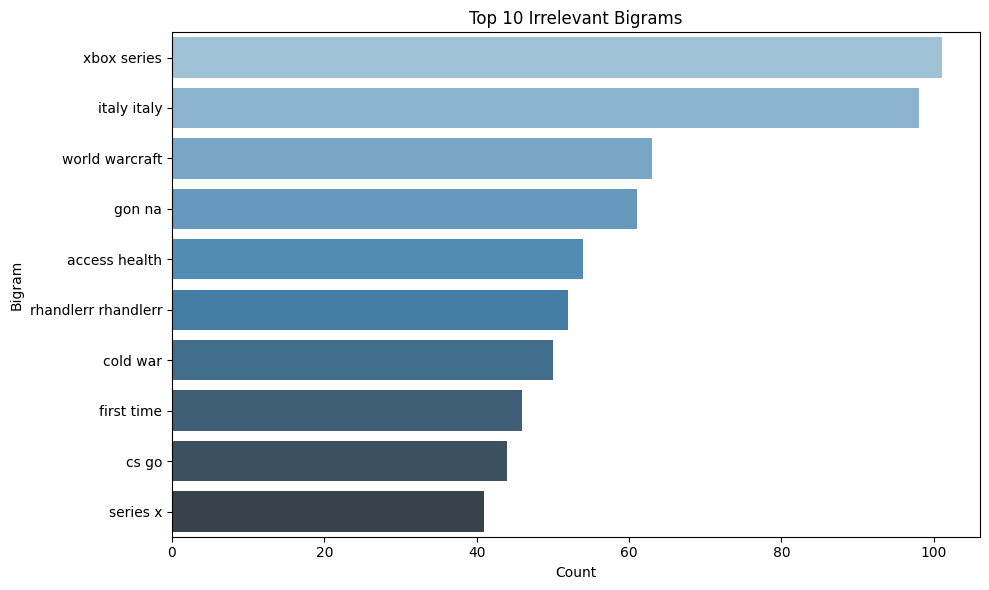

In [12]:
import nltk
nltk.download('punkt_tab')
from nltk.util import ngrams

stop_words = set(stopwords.words('english'))

def get_top_ngrams(text, n=2, top_k=10):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    n_grams = list(ngrams(tokens, n))
    n_gram_counts = Counter(n_grams)
    return n_gram_counts.most_common(top_k)

# Get top bigrams for each sentiment
top_positive_bigrams = get_top_ngrams(positive_text, n=2)
top_negative_bigrams = get_top_ngrams(negative_text, n=2)
top_neutral_bigrams = get_top_ngrams(neutral_text, n=2)
top_irrelevant_bigrams = get_top_ngrams(irrelevant_text, n=2)

print("\nTop 10 Positive Bigrams:", top_positive_bigrams)
print("Top 10 Negative Bigrams:", top_negative_bigrams)
print("Top 10 Neutral Bigrams:", top_neutral_bigrams)
print("Top 10 Irrelevant Bigrams:", top_irrelevant_bigrams)

# Function to plot n-grams
def plot_ngrams(ngrams_list, title):
    words = [" ".join(ngram[0]) for ngram in ngrams_list]
    counts = [ngram[1] for ngram in ngrams_list]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=words, palette='Blues_d')
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Bigram')
    plt.tight_layout()
    plt.show()

plot_ngrams(top_positive_bigrams, 'Top 10 Positive Bigrams')
plot_ngrams(top_negative_bigrams, 'Top 10 Negative Bigrams')
plot_ngrams(top_neutral_bigrams, 'Top 10 Neutral Bigrams')
plot_ngrams(top_irrelevant_bigrams, 'Top 10 Irrelevant Bigrams')

